In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Sleep Dataset (Update the path accordingly)
file_path = "/content/drive/MyDrive/SocialMedia_Datathon_2025/Sleep Dataset.xlsm"
# df = pd.read_excel(file_path)

In [ ]:

# Read the file WITHOUT converting "None" to NaN
df = pd.read_excel(file_path, keep_default_na=False, dtype=str)

# Display first few rows
print("Dataset Overview:")
display(df.head())



Dataset Overview:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

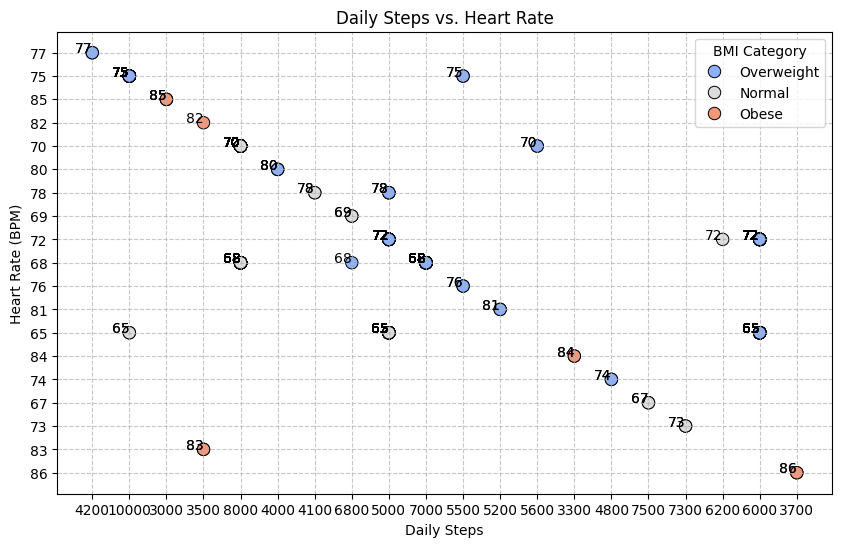

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Daily Steps"], y=df["Heart Rate"], hue=df["BMI Category"], palette="coolwarm", s=80, edgecolor="black")

# Annotate points
for i in range(len(df)):
    plt.text(df["Daily Steps"][i], df["Heart Rate"][i], f'{df["Heart Rate"][i]}', fontsize=10, ha='right')

plt.title("Daily Steps vs. Heart Rate")
plt.xlabel("Daily Steps")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="BMI Category")
plt.show()


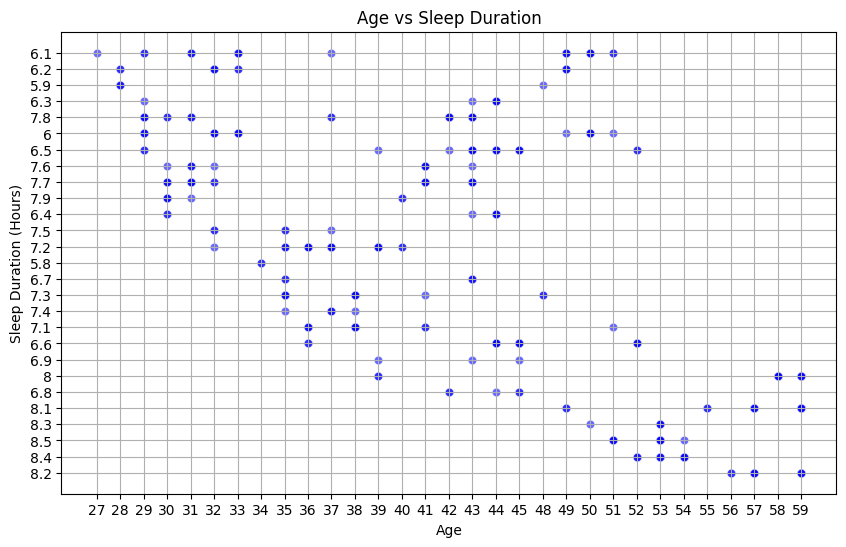

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Age"], y=df["Sleep Duration"], alpha=0.6, color="blue")

plt.xlabel("Age")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Age vs Sleep Duration")
plt.grid(True)
plt.show()


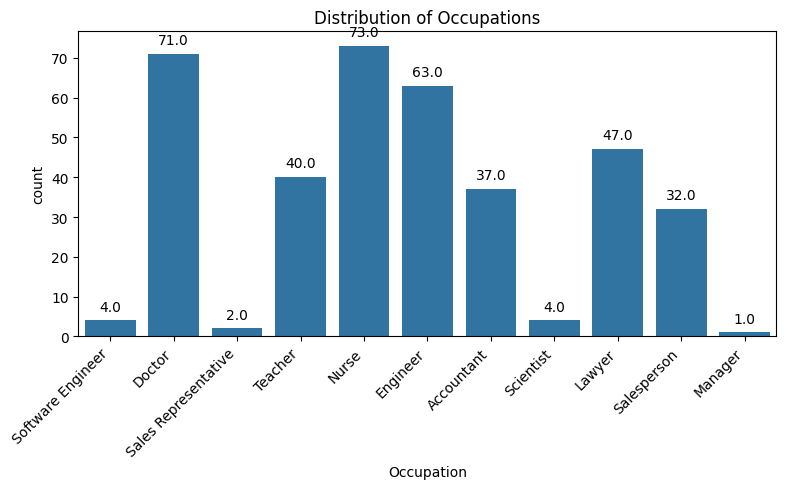

In [ ]:
# Count Plot for Occupation
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Occupation', data=df)
plt.title('Distribution of Occupations')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
df["Age"] = df["Age"].astype(int)
df["Person ID"] = df["Person ID"].astype(int)
print(df.dtypes)

Person ID                   int64
Gender                     object
Age                         int64
Occupation                 object
Sleep Duration             object
Quality of Sleep           object
Physical Activity Level    object
Stress Level               object
BMI Category               object
Blood Pressure             object
Heart Rate                 object
Daily Steps                object
Sleep Disorder             object
dtype: object


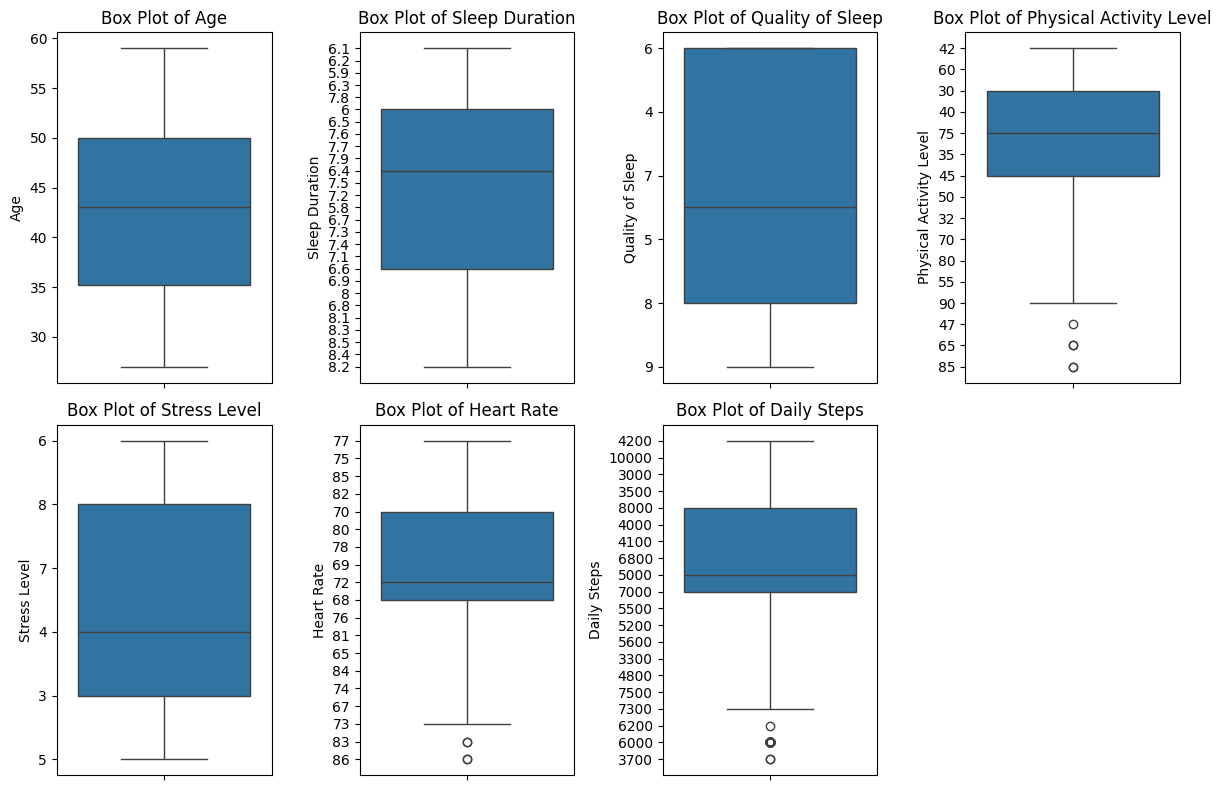

In [ ]:
# Box plots for numerical columns
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # Adjust layout as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

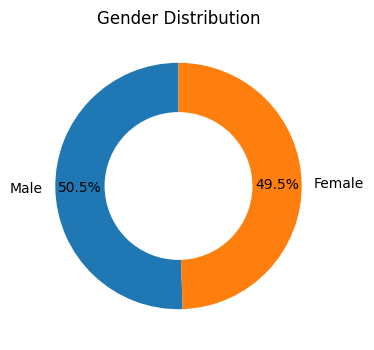

In [ ]:
gender_counts = df['Gender'].value_counts()

# Plotting the donut chart (gender distribution)
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8)

# Draw a white circle in the center to create the donut hole
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Gender Distribution')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter(df, x="Age", y="Stress Level", color="Gender")
fig.update_layout(
    title="Age vs Stress Level",
    xaxis_title="Age",
    yaxis_title="Stress Level",
    font=dict(
        size=12
    )
)
fig.show()

In [ ]:
fig = px.scatter(df, x='Sleep Duration', y='Stress Level', color='Gender')
fig.update_layout(
    title='Sleep Duration vs Stress Level',
    xaxis_title='Sleep Duration',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    )
)
fig.show()

In [ ]:
fig = px.scatter(df, x='Quality of Sleep', y='Stress Level', color='Gender', marginal_y='box', marginal_x='box')
fig.update_layout(
    title='Quality of Sleep vs Stress Level',
    xaxis_title='Quality of Sleep',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    )
)
fig.show()


In [ ]:
fig = px.histogram(df, x='Age', nbins=20, color_discrete_sequence=px.colors.sequential.RdBu, color='Gender')
fig.update_traces(opacity=0.7)
fig.update_layout(
    title='Age Distribution',
    xaxis_title='Age',
    yaxis_title=None,
    font = dict(
        size=12
    ),
    width=900
)
fig.show()

In [ ]:
fig = px.histogram(df, x='Stress Level', color='Gender', color_discrete_sequence=px.colors.sequential.RdBu, nbins=10)
fig.update_traces(opacity=.7)
fig.update_layout(
    title='Stress Level Distribution',
    xaxis_title='Stress Level',
    yaxis_title=None,
    font = dict(
        size=12
    ),
    width=900
)
fig.show()

In [ ]:
# Convert 'Sleep Duration' to numeric
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')


<ipython-input-68-c9db6aeb9a85>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



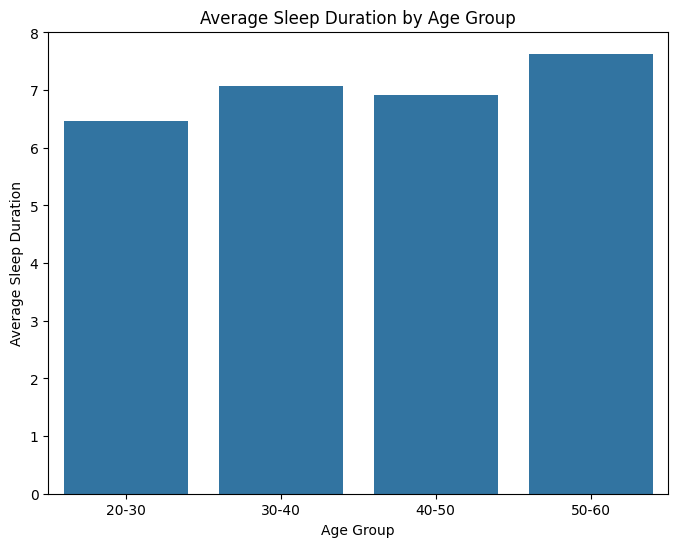

In [ ]:
age_bins = [20, 30, 40, 50, 60]  # Example: 20-30, 30-40, etc.
age_labels = ['20-30', '30-40', '40-50', '50-60']

# Create a new column 'Age Group'
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, right=False, labels=age_labels)

# Calculate average Sleep Duration for each Age Group
avg_sleep_by_age_group = df.groupby('Age Group')['Sleep Duration'].mean().reset_index()

# Bar graph between Age Group and Average Sleep Duration
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Sleep Duration', data=avg_sleep_by_age_group)
plt.title('Average Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration')
plt.show()

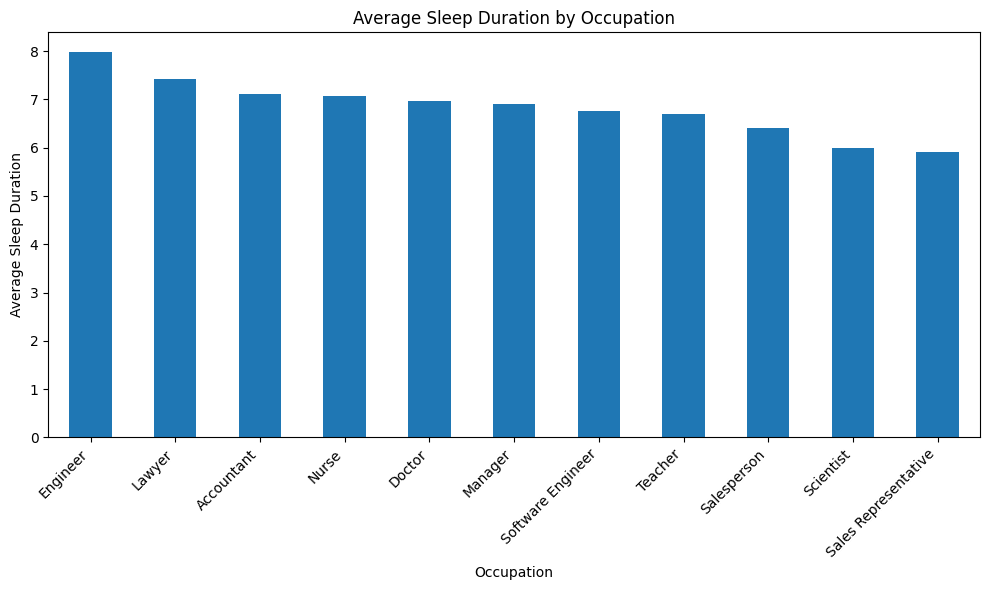

In [ ]:
# 3. Bar Plot: Average Sleep Duration by Occupation
avg_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_sleep_by_occupation.plot(kind='bar')
plt.title('Average Sleep Duration by Occupation')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA: Occupation vs. Sleep Duration
model = ols('Q("Sleep Duration") ~ C(Occupation)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA: Occupation vs. Sleep Duration")
print(anova_table)

# Chi-Squared Test: Occupation vs. Sleep Disorder
contingency_table = pd.crosstab(df['Occupation'], df['Sleep Disorder'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Squared Test: Occupation vs. Sleep Disorder")
print(f"Chi2: {chi2}, P-value: {p}")



# ANOVA: There is a statistically significant relationship between "Occupation" and "Sleep Duration." Different occupations have different average sleep durations.
# Chi-Squared: There is a statistically significant association between "Occupation" and "Sleep Disorder." The distribution of sleep disorders varies across occupations.


ANOVA: Occupation vs. Sleep Duration
                   sum_sq     df          F        PR(>F)
C(Occupation)   85.563496   10.0  20.627777  2.911752e-30
Residual       150.571477  363.0        NaN           NaN

Chi-Squared Test: Occupation vs. Sleep Disorder
Chi2: 421.362754888135, P-value: 7.481314161858014e-77


In [ ]:
# Splitting Blood Pressure into two separate columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Dropping the original column
df.drop(columns=['Blood Pressure'], inplace=True)


In [ ]:
# ---- 2️⃣ Encoding Categorical Variables (Only If Required) ----
categorical_cols = ["Gender","BMI Category","Sleep Disorder"]

if any(df[col].dtype == 'object' for col in categorical_cols):
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Save encoders for later use
    print("\nCategorical Variables Encoded.")
else:
    print("\nNo Categorical Encoding Required.")


Categorical Variables Encoded.


In [ ]:
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Age Group
0,1,1,27,Software Engineer,6.1,6,42,6,2,77,4200,1,126.0,83.0,20-30
1,2,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,20-30
2,3,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,20-30
3,4,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,20-30
4,5,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,20-30


In [ ]:
# Define numerical columns (excluding 'Blood Pressure')
num_cols = ["Sleep Duration", "Quality of Sleep", "Physical Activity Level",
            "Stress Level", "Heart Rate", "Daily Steps"]

# Convert numeric columns to float
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nNumeric Columns Converted Successfully.")
display(df.head())



Numeric Columns Converted Successfully.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Age Group
0,1,1,27,Software Engineer,6.1,6,42,6,2,77,4200,1,126.0,83.0,20-30
1,2,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,20-30
2,3,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,20-30
3,4,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,20-30
4,5,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,20-30


In [ ]:
df.drop(columns=['Age Group','Person ID'], inplace=True)

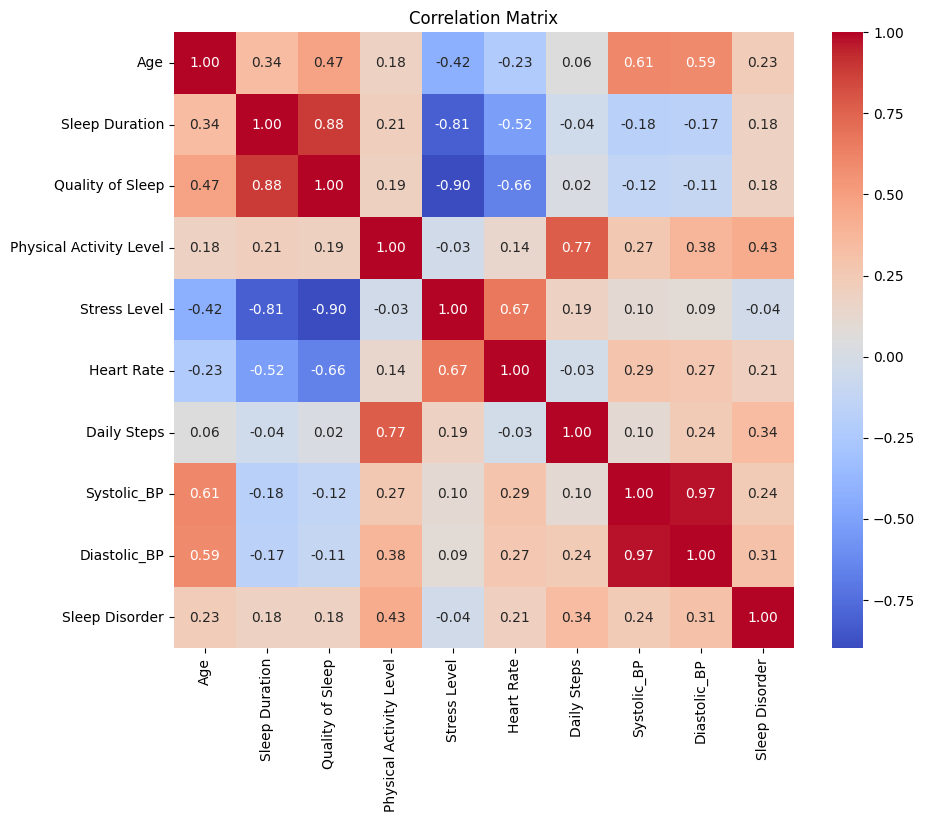

In [ ]:
 numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP','Sleep Disorder']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numerical_cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

#measure of multicollinearity
# VIF > 10: Generally, a VIF greater than 10 is considered a sign of significant multicollinearity.
# VIF > 100 or 1000: In your case, you have VIFs in the thousands, which is extremely high and indicates a very strong linear relationship between some of your features.

     VIF Factor                 features
0     69.440237                      Age
1    411.588822           Sleep Duration
2    454.550139         Quality of Sleep
3     32.302620  Physical Activity Level
4     97.393159             Stress Level
5    673.677318               Heart Rate
6     87.043935              Daily Steps
7  10105.372133              Systolic_BP
8   7804.068741             Diastolic_BP
9      4.879804           Sleep Disorder


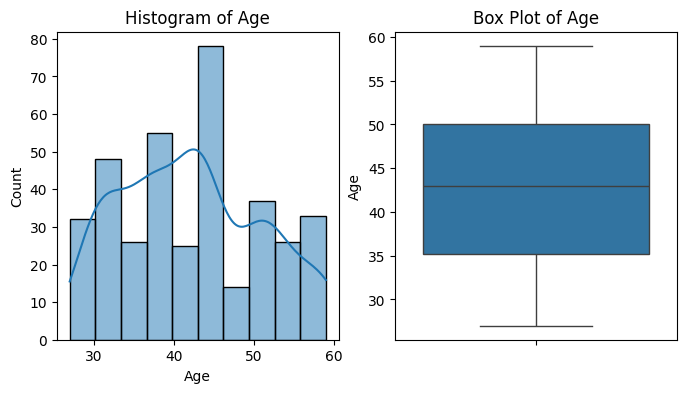

Skewness of Age: 0.2561893511793312
Age is roughly symmetrically distributed.
------------------------------


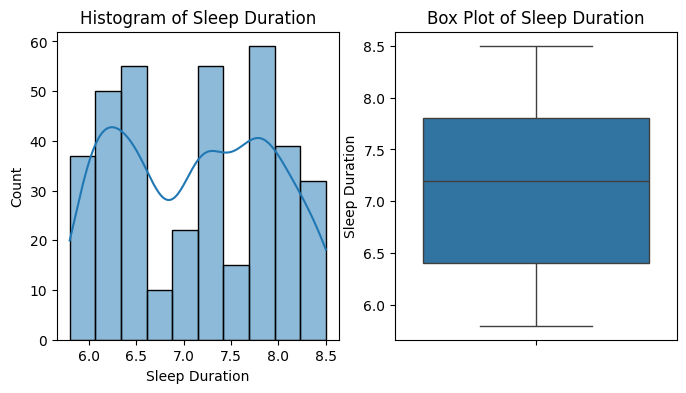

Skewness of Sleep Duration: 0.037403602518975176
Sleep Duration is roughly symmetrically distributed.
------------------------------


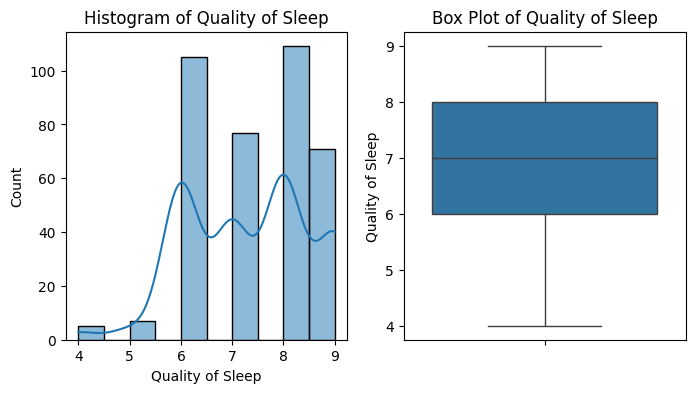

Skewness of Quality of Sleep: -0.20661469385504258
Quality of Sleep is roughly symmetrically distributed.
------------------------------


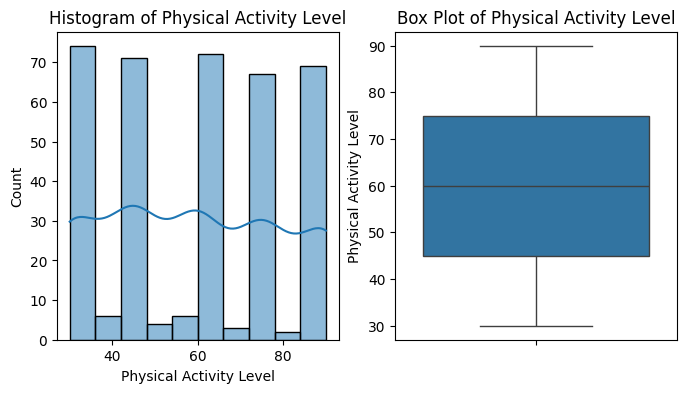

Skewness of Physical Activity Level: 0.07418782500797434
Physical Activity Level is roughly symmetrically distributed.
------------------------------


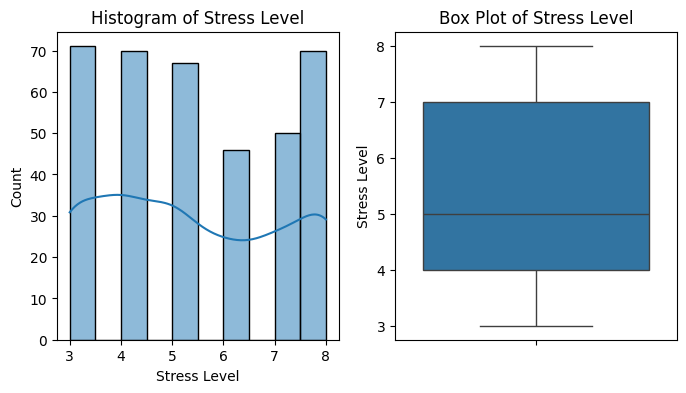

Skewness of Stress Level: 0.15370992182999813
Stress Level is roughly symmetrically distributed.
------------------------------


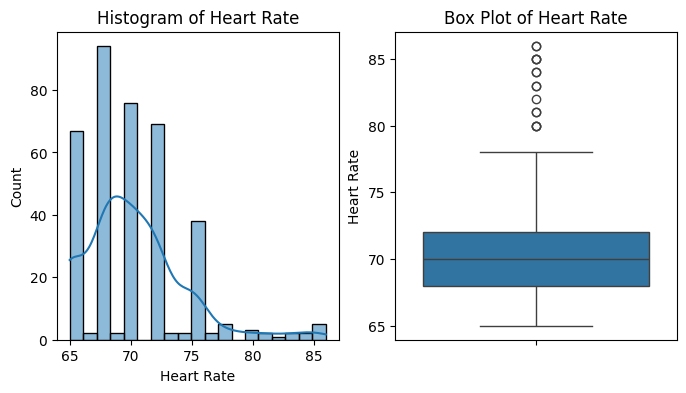

Skewness of Heart Rate: 1.2199056700731632
Heart Rate is positively skewed (right-skewed).
------------------------------


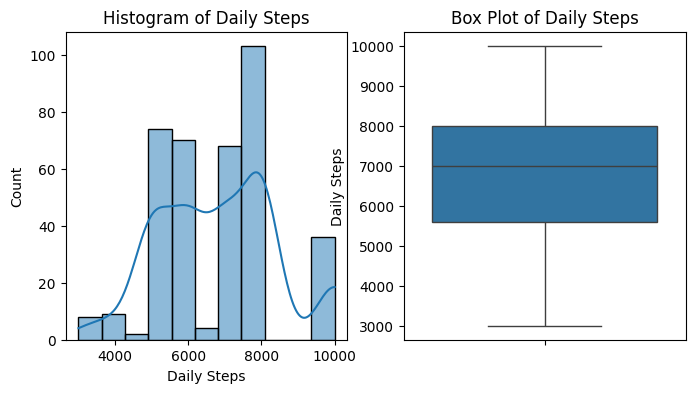

Skewness of Daily Steps: 0.17756151681455
Daily Steps is roughly symmetrically distributed.
------------------------------


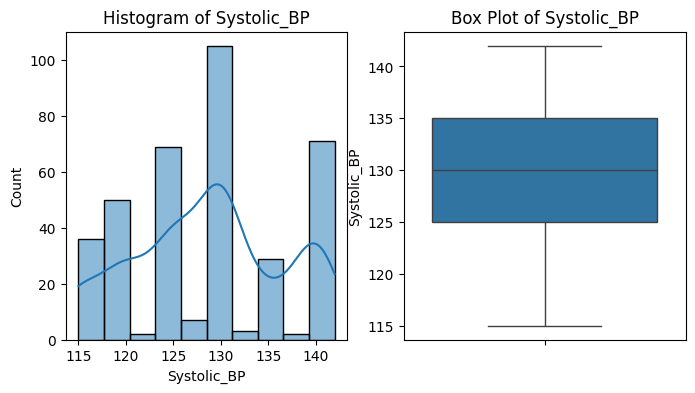

Skewness of Systolic_BP: -0.03552565092220491
Systolic_BP is roughly symmetrically distributed.
------------------------------


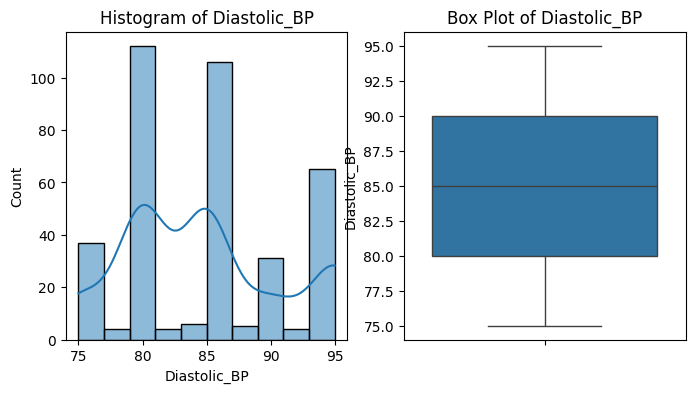

Skewness of Diastolic_BP: 0.37705009626387237
Diastolic_BP is roughly symmetrically distributed.
------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

for col in numerical_cols:
    # 1. Histogram
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # 2. Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

    plt.show()

    # 3. Skewness
    skewness = skew(df[col], nan_policy='omit')  # nan_policy to handle NaN values
    print(f"Skewness of {col}: {skewness}")

    if skewness > 0.5:
        print(f"{col} is positively skewed (right-skewed).")
    elif skewness < -0.5:
        print(f"{col} is negatively skewed (left-skewed).")
    else:
        print(f"{col} is roughly symmetrically distributed.")

    print("-" * 30)

In [ ]:
#  to reduce skewness, stabilize variance
# Apply log transformation to 'Heart Rate'
df['Heart Rate_log'] = np.log1p(df['Heart Rate'])

# Check skewness of the transformed column
skewness_log = skew(df['Heart Rate_log'], nan_policy='omit')
print(f"Skewness of Heart Rate (log-transformed): {skewness_log}")
df.drop(columns=['Heart Rate'], inplace=True)

Skewness of Heart Rate (log-transformed): 0.9991468033573948


In [ ]:
display(df.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Heart Rate_log
0,1,27,Software Engineer,6.1,6,42,6,2,4200,1,126.0,83.0,4.356709
1,1,28,Doctor,6.2,6,60,8,0,10000,1,125.0,80.0,4.330733
2,1,28,Doctor,6.2,6,60,8,0,10000,1,125.0,80.0,4.330733
3,1,28,Sales Representative,5.9,4,30,8,1,3000,2,140.0,90.0,4.454347
4,1,28,Sales Representative,5.9,4,30,8,1,3000,2,140.0,90.0,4.454347


In [ ]:
# Feature Engineering: Create 'Mean Blood Pressure' using the correct formula
df['Mean_BP'] = df['Diastolic_BP'] + (1/3) * (df['Systolic_BP'] - df['Diastolic_BP'])

# Remove Highly Correlated Features
reduced_features = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps', 'Mean_BP']
X = df[reduced_features]

# Calculate VIF again
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)



   VIF Factor                 features
0   55.155625                      Age
1   79.227474         Quality of Sleep
2   26.305791  Physical Activity Level
3   38.151980             Stress Level
4   57.182757              Daily Steps
5  258.652189                  Mean_BP


In [ ]:
df.drop(columns=['Systolic_BP',	'Diastolic_BP'], inplace=True)
display(df.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate_log,Mean_BP
0,1,27,Software Engineer,6.1,6,42,6,2,4200,1,4.356709,97.333333
1,1,28,Doctor,6.2,6,60,8,0,10000,1,4.330733,95.000000
2,1,28,Doctor,6.2,6,60,8,0,10000,1,4.330733,95.000000
3,1,28,Sales Representative,5.9,4,30,8,1,3000,2,4.454347,106.666667
4,1,28,Sales Representative,5.9,4,30,8,1,3000,2,4.454347,106.666667


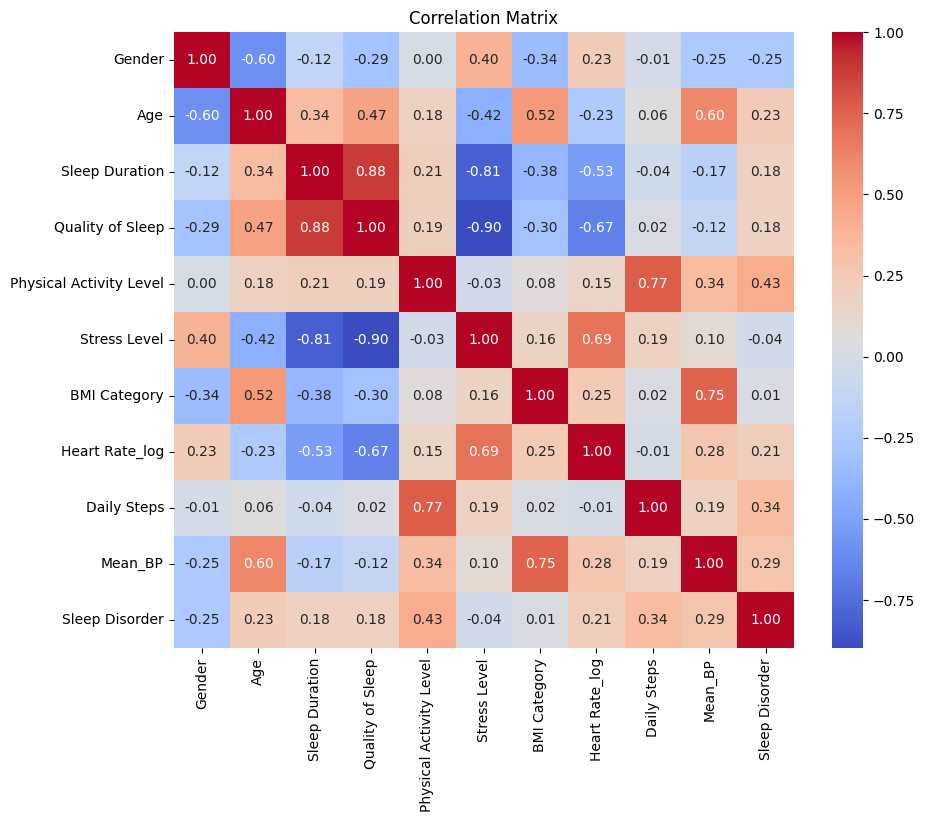

In [ ]:
numerical_cols_final = ['Gender','Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','BMI Category', 'Heart Rate_log','Daily Steps', 'Mean_BP','Sleep Disorder']
correlation_matrix = df[numerical_cols_final].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# as future scope we can consider health score

# df['Health_Score'] = (df['Quality of Sleep'] + df['Physical Activity Level'] - df['Stress Level'] - df['Mean_BP'] - df['BMI Category'])


In [ ]:
df.head()

# Correlation Matrix Analysis

# Age:
# Shows moderate positive correlation with "Mean_BP."
# Moderate negative correlation with "Gender."
# Quality of Sleep:
# High positive correlation with "Sleep Duration."
# High negative correlation with "Stress Level."
# Physical Activity Level:
# High positive correlation with "Daily Steps."
# Stress Level:
# High negative correlation with "Quality of Sleep" and "Sleep Duration."
# BMI Category:
# Moderate positive correlation with "Mean_BP."
# Heart Rate_log:
# Moderate negative correlation with "Quality of Sleep" and "Sleep Duration."
# Moderate positive correlation with "Stress Level."
# Daily Steps:
# High positive correlation with "Physical Activity Level."
# Mean_BP:
# Moderate positive correlation with "Age" and "BMI Category."
# Sleep Disorder:
# Moderate positive correlation with "Mean_BP".
# Moderate negative correlation with "Gender" and "Quality of Sleep."

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Heart Rate_log,Mean_BP
0,1,27,Software Engineer,6.1,6,42,6,2,77,4200,1,126.0,83.0,4.356709,97.333333
1,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,4.330733,95.000000
2,1,28,Doctor,6.2,6,60,8,0,75,10000,1,125.0,80.0,4.330733,95.000000
3,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,4.454347,106.666667
4,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140.0,90.0,4.454347,106.666667


In [ ]:
# df.drop(columns=['Person ID','Sleep Duration','Daily Steps','Age Group','Systolic_BP','Diastolic_BP','Heart Rate'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Perform One-Hot Encoding on the 'Occupation' column with integer values (0/1)
df = pd.get_dummies(df, columns=['Occupation'], prefix='Occ', dtype=int)

# Display the first few rows after encoding
print(df.head())


   Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0       1   27             6.1                 6                       42   
1       1   28             6.2                 6                       60   
2       1   28             6.2                 6                       60   
3       1   28             5.9                 4                       30   
4       1   28             5.9                 4                       30   

   Stress Level  BMI Category  Daily Steps  Sleep Disorder  Heart Rate_log  \
0             6             2         4200               1        4.356709   
1             8             0        10000               1        4.330733   
2             8             0        10000               1        4.330733   
3             8             1         3000               2        4.454347   
4             8             1         3000               2        4.454347   

   ...  Occ_Doctor  Occ_Engineer  Occ_Lawyer  Occ_Manager  Occ_Nurse

In [ ]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate_log,...,Occ_Doctor,Occ_Engineer,Occ_Lawyer,Occ_Manager,Occ_Nurse,Occ_Sales Representative,Occ_Salesperson,Occ_Scientist,Occ_Software Engineer,Occ_Teacher
0,1,27,6.1,6,42,6,2,4200,1,4.356709,...,0,0,0,0,0,0,0,0,1,0
1,1,28,6.2,6,60,8,0,10000,1,4.330733,...,1,0,0,0,0,0,0,0,0,0
2,1,28,6.2,6,60,8,0,10000,1,4.330733,...,1,0,0,0,0,0,0,0,0,0
3,1,28,5.9,4,30,8,1,3000,2,4.454347,...,0,0,0,0,0,1,0,0,0,0
4,1,28,5.9,4,30,8,1,3000,2,4.454347,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# df["Age"] = df["Age"].astype(int)
# df["Person ID"] = df["Person ID"].astype(int)
# print(df.dtypes)

In [ ]:
print(df.dtypes)

Gender                        int64
Age                           int64
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                  int64
Daily Steps                   int64
Sleep Disorder                int64
Heart Rate_log              float64
Mean_BP                     float64
Occ_Accountant                int64
Occ_Doctor                    int64
Occ_Engineer                  int64
Occ_Lawyer                    int64
Occ_Manager                   int64
Occ_Nurse                     int64
Occ_Sales Representative      int64
Occ_Salesperson               int64
Occ_Scientist                 int64
Occ_Software Engineer         int64
Occ_Teacher                   int64
dtype: object


In [ ]:
# df["Age"] = df["Age"].astype(int)
# df["Person ID"] = df["Person ID"].astype(int)
# print(df.dtypes)

In [ ]:
display(df.head())  # Shows the first few rows

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate_log,...,Occ_Doctor,Occ_Engineer,Occ_Lawyer,Occ_Manager,Occ_Nurse,Occ_Sales Representative,Occ_Salesperson,Occ_Scientist,Occ_Software Engineer,Occ_Teacher
0,1,27,6.1,6,42,6,2,4200,1,4.356709,...,0,0,0,0,0,0,0,0,1,0
1,1,28,6.2,6,60,8,0,10000,1,4.330733,...,1,0,0,0,0,0,0,0,0,0
2,1,28,6.2,6,60,8,0,10000,1,4.330733,...,1,0,0,0,0,0,0,0,0,0
3,1,28,5.9,4,30,8,1,3000,2,4.454347,...,0,0,0,0,0,1,0,0,0,0
4,1,28,5.9,4,30,8,1,3000,2,4.454347,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_cols =  ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate_log','Mean_BP']

In [ ]:
#StandardScaler
standard_scaler = StandardScaler()
df_standard = df.copy() # Make a copy to avoid overwriting original data
df_standard[numerical_cols] = standard_scaler.fit_transform(df_standard[numerical_cols])


zeros_standard = (df_standard[numerical_cols] == 0).sum()
print("\nZero Counts with StandardScaler:")
print(zeros_standard)


Zero Counts with StandardScaler:
Age                        0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate_log             0
Mean_BP                    0
dtype: int64


In [ ]:
display(df_standard.head())

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate_log,...,Occ_Doctor,Occ_Engineer,Occ_Lawyer,Occ_Manager,Occ_Nurse,Occ_Sales Representative,Occ_Salesperson,Occ_Scientist,Occ_Software Engineer,Occ_Teacher
0,1,-1.753096,6.1,-1.098280,-0.825418,0.347021,2,4200,1,1.656153,...,0,0,0,0,0,0,0,0,1,0
1,1,-1.637643,6.2,-1.098280,0.039844,1.475592,0,10000,1,1.195138,...,1,0,0,0,0,0,0,0,0,0
2,1,-1.637643,6.2,-1.098280,0.039844,1.475592,0,10000,1,1.195138,...,1,0,0,0,0,0,0,0,0,0
3,1,-1.637643,5.9,-2.771424,-1.402260,1.475592,1,3000,2,3.389047,...,0,0,0,0,0,1,0,0,0,0
4,1,-1.637643,5.9,-2.771424,-1.402260,1.475592,1,3000,2,3.389047,...,0,0,0,0,0,1,0,0,0,0


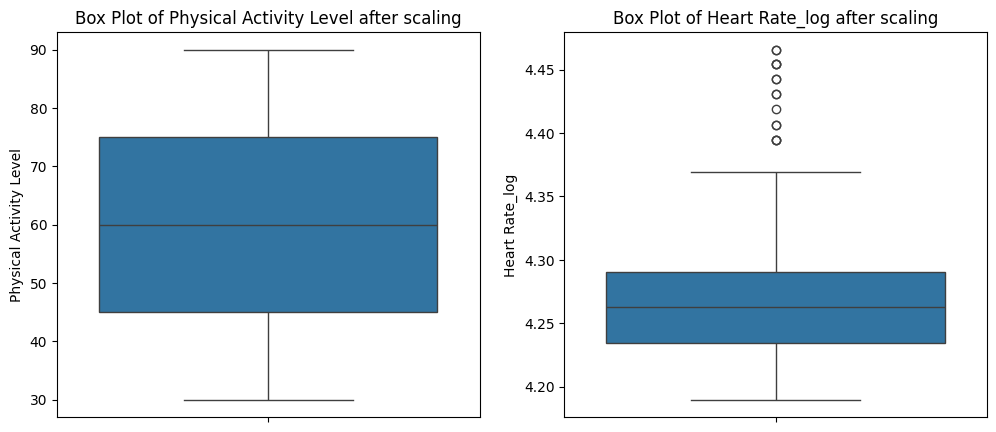

In [ ]:
# Visualize the columns after scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Physical Activity Level'])
plt.title('Box Plot of Physical Activity Level after scaling')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Heart Rate_log'])
plt.title('Box Plot of Heart Rate_log after scaling')

plt.show()

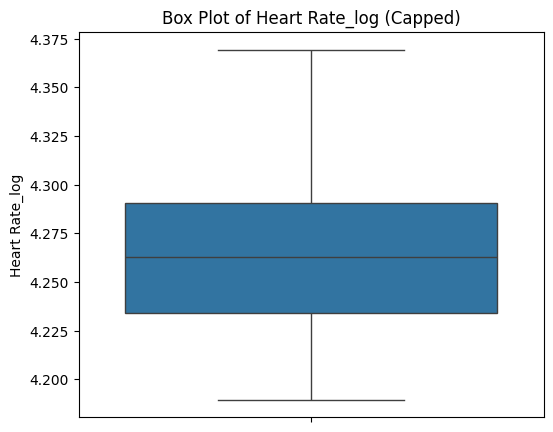

In [ ]:
# Capping Outliers in 'Heart Rate_log'
upper_limit = df['Heart Rate_log'].quantile(0.95)  # Cap at 95th percentile
df['Heart Rate_log'] = np.where(df['Heart Rate_log'] > upper_limit, upper_limit, df['Heart Rate_log'])

# Visualize 'Heart Rate_log' after capping
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Heart Rate_log'])
plt.title('Box Plot of Heart Rate_log (Capped)')
plt.show()

In [ ]:
display(df_standard)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Heart Rate_log,...,Occ_Doctor,Occ_Engineer,Occ_Lawyer,Occ_Manager,Occ_Nurse,Occ_Sales Representative,Occ_Salesperson,Occ_Scientist,Occ_Software Engineer,Occ_Teacher
0,1,-1.753096,6.1,-1.098280,-0.825418,0.347021,2,4200,1,1.656153,...,0,0,0,0,0,0,0,0,1,0
1,1,-1.637643,6.2,-1.098280,0.039844,1.475592,0,10000,1,1.195138,...,1,0,0,0,0,0,0,0,0,0
2,1,-1.637643,6.2,-1.098280,0.039844,1.475592,0,10000,1,1.195138,...,1,0,0,0,0,0,0,0,0,0
3,1,-1.637643,5.9,-2.771424,-1.402260,1.475592,1,3000,2,3.389047,...,0,0,0,0,0,1,0,0,0,0
4,1,-1.637643,5.9,-2.771424,-1.402260,1.475592,1,3000,2,3.389047,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,8.1,1.411435,0.760896,-1.345836,2,7000,2,-0.519801,...,0,0,0,0,1,0,0,0,0,0
370,0,1.941401,8.0,1.411435,0.760896,-1.345836,2,7000,2,-0.519801,...,0,0,0,0,1,0,0,0,0,0
371,0,1.941401,8.1,1.411435,0.760896,-1.345836,2,7000,2,-0.519801,...,0,0,0,0,1,0,0,0,0,0
372,0,1.941401,8.1,1.411435,0.760896,-1.345836,2,7000,2,-0.519801,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Assuming df_standard is your scaled DataFrame

features = df_standard.drop(['Sleep Disorder', 'Quality of Sleep', 'Physical Activity Level'], axis=1)

# Apply PCA
pca = PCA()
pca.fit(features)

# Component Loadings (Coefficients)
loadings = pca.components_

# Create DataFrame for Loadings
loadings_df = pd.DataFrame(loadings, columns=features.columns)

# Absolute Loadings (Importance)
abs_loadings_df = loadings_df.abs()

# Sum of Absolute Loadings (Overall Importance)
feature_importance = abs_loadings_df.sum(axis=0)

# Sort by Importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Print Feature Importance
print("Feature Importance (Sum of Absolute Loadings):")
print(feature_importance_sorted)

Feature Importance (Sum of Absolute Loadings):
Occ_Teacher                 3.426804
Occ_Nurse                   3.392038
Occ_Lawyer                  3.382784
Occ_Doctor                  3.312171
Occ_Salesperson             3.281591
Occ_Accountant              3.276766
BMI Category                3.132964
Mean_BP                     3.123014
Occ_Engineer                3.092750
Sleep Duration              2.973055
Age                         2.943483
Gender                      2.935034
Stress Level                2.873565
Heart Rate_log              2.816283
Occ_Scientist               2.187321
Occ_Software Engineer       1.936672
Occ_Sales Representative    1.806661
Occ_Manager                 1.624432
Daily Steps                 1.000655
dtype: float64


In [ ]:

# Define the path where you want to save the file
file_path = "/content/drive/MyDrive/SocialMedia_Datathon_2025/Sleep_cleaned_dataset_final.csv"  # Change this to your specific folder

# Assuming your cleaned DataFrame is named `df`
df_standard.to_csv(file_path, index=False)

print(f"Dataset saved successfully at: {file_path}")


Dataset saved successfully at: /content/drive/MyDrive/SocialMedia_Datathon_2025/Sleep_cleaned_dataset_final.csv


In [ ]:
display(df_standard)

,Gender,Age,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Sleep Disorder,Occ_Accountant,Occ_Doctor,Occ_Engineer,Occ_Lawyer,Occ_Manager,Occ_Nurse,Occ_Sales Representative,Occ_Salesperson,Occ_Scientist,Occ_Software Engineer,Occ_Teacher
0,1,-1.753096,-1.098280,-0.825418,0.347021,2,1,0,0,0,0,0,0,0,0,0,1,0
1,1,-1.637643,-1.098280,0.039844,1.475592,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1,-1.637643,-1.098280,0.039844,1.475592,0,1,0,1,0,0,0,0,0,0,0,0,0
3,1,-1.637643,-2.771424,-1.402260,1.475592,1,2,0,0,0,0,0,0,1,0,0,0,0
4,1,-1.637643,-2.771424,-1.402260,1.475592,1,2,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,1.411435,0.760896,-1.345836,2,2,0,0,0,0,0,1,0,0,0,0,0
370,0,1.941401,1.411435,0.760896,-1.345836,2,2,0,0,0,0,0,1,0,0,0,0,0
371,0,1.941401,1.411435,0.760896,-1.345836,2,2,0,0,0,0,0,1,0,0,0,0,0
372,0,1.941401,1.411435,0.760896,-1.345836,2,2,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_standard.drop(columns=['Heart Rate_log','Sleep Duration','Daily Steps','Sleep Duration','Mean_BP'], inplace=True)

In [ ]:

# # Feature Importance Evaluation (Example with RandomForestClassifier)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# features = df.drop('Sleep Disorder', axis=1).columns
# target = 'Sleep Disorder'

# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(feature_importances)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# features and targets
features = df_standard.drop(['Sleep Disorder', 'Quality of Sleep', 'Physical Activity Level'], axis=1)
target_sleep_disorder = df_standard['Sleep Disorder']
target_sleep_quality = df_standard['Quality of Sleep']
target_physical_activity = df_standard['Physical Activity Level']

#  training and testing sets
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(features, target_sleep_disorder, test_size=0.2, random_state=42)
X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(features, target_sleep_quality, test_size=0.2, random_state=42)
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(features, target_physical_activity, test_size=0.2, random_state=42)

In [ ]:
print("Data type of target_sleep_quality:", target_sleep_quality.dtypes)
print("Data type of target_physical_activity:", target_physical_activity.dtypes)
print("Data type of target_sleep_disorder:", target_sleep_disorder.dtypes)

Data type of target_sleep_quality: float64
Data type of target_physical_activity: float64
Data type of target_sleep_disorder: int64


In [ ]:
import pandas as pd

# Assuming you have target_sleep_quality, target_physical_activity, and target_sleep_disorder

# Check unique values
print("Unique values in target_sleep_quality:", target_sleep_quality.unique())
print("Unique values in target_physical_activity:", target_physical_activity.unique())
print("Unique values in target_sleep_disorder:", target_sleep_disorder.unique())

# Check number of unique values
print("Number of unique values in target_sleep_quality:", target_sleep_quality.nunique())
print("Number of unique values in target_physical_activity:", target_physical_activity.nunique())
print("Number of unique values in target_sleep_disorder:", target_sleep_disorder.nunique())

# Check value counts
print("Value counts for target_sleep_quality:\n", target_sleep_quality.value_counts())
print("Value counts for target_physical_activity:\n", target_physical_activity.value_counts())
print("Value counts for target_sleep_disorder:\n", target_sleep_disorder.value_counts())

Unique values in target_sleep_quality: [-1.09828011 -2.77142374 -0.26170829 -1.93485192  0.57486352  1.41143533]
Unique values in target_physical_activity: [-0.82541823  0.03984423 -1.40225988 -0.92155851  0.76089629 -1.16190919
 -0.68120782 -0.44085714 -1.3061196   0.5205456   1.00124697 -0.20050645
  1.48194834 -0.58506755  0.28019492  1.24159766]
Unique values in target_sleep_disorder: [1 2 0]
Number of unique values in target_sleep_quality: 6
Number of unique values in target_physical_activity: 16
Number of unique values in target_sleep_disorder: 3
Value counts for target_sleep_quality:
 Quality of Sleep
 0.574864    109
-1.098280    105
-0.261708     77
 1.411435     71
-1.934852      7
-2.771424      5
Name: count, dtype: int64
Value counts for target_physical_activity:
 Physical Activity Level
 0.039844    70
-1.402260    68
-0.681208    68
 0.760896    67
 1.481948    67
-0.921559     6
-0.200506     6
-1.161909     4
-0.440857     4
 0.520546     3
-0.825418     2
-1.306120   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have df_standard, target_sleep_quality, target_physical_activity, and target_sleep_disorder

features = df_standard.drop(['Sleep Disorder', 'Quality of Sleep', 'Physical Activity Level'], axis=1)

# Split data into training and testing sets
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(features, target_sleep_disorder, test_size=0.2, random_state=42)
X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(features, target_sleep_quality, test_size=0.2, random_state=42)
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(features, target_physical_activity, test_size=0.2, random_state=42)

# Models (Classification)
model_sd = RandomForestClassifier(random_state=42)
model_sq = RandomForestRegressor(random_state=42)
model_pa = RandomForestRegressor(random_state=42)

# Train Models
model_sd.fit(X_train_sd, y_train_sd)
model_sq.fit(X_train_sq, y_train_sq)
model_pa.fit(X_train_pa, y_train_pa)

# Predictions
y_pred_sd = model_sd.predict(X_test_sd)
y_pred_sq = model_sq.predict(X_test_sq)
y_pred_pa = model_pa.predict(X_test_pa)

# Evaluation (Classification Metrics)
print("Sleep Disorder Classification Report:")
print(classification_report(y_test_sd, y_pred_sd))
print("Sleep Disorder Accuracy:", accuracy_score(y_test_sd, y_pred_sd))

print("\nSleep Quality Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_sq, y_pred_sq))
print("R-squared:", r2_score(y_test_sq, y_pred_sq))

print("\nPhysical Activity Level Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_pa, y_pred_pa))
print("R-squared:", r2_score(y_test_pa, y_pred_pa))

Sleep Disorder Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.98      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75

Sleep Disorder Accuracy: 0.88

Sleep Quality Regression Metrics:
Mean Squared Error: 0.03790400600405279
R-squared: 0.9640996936130096

Physical Activity Level Regression Metrics:
Mean Squared Error: 0.01826315248831598
R-squared: 0.9810541201483359


Sleep Disorder Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.98      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75

Sleep Disorder Accuracy: 0.88
Sleep Disorder Train Accuracy: 0.9331103678929766


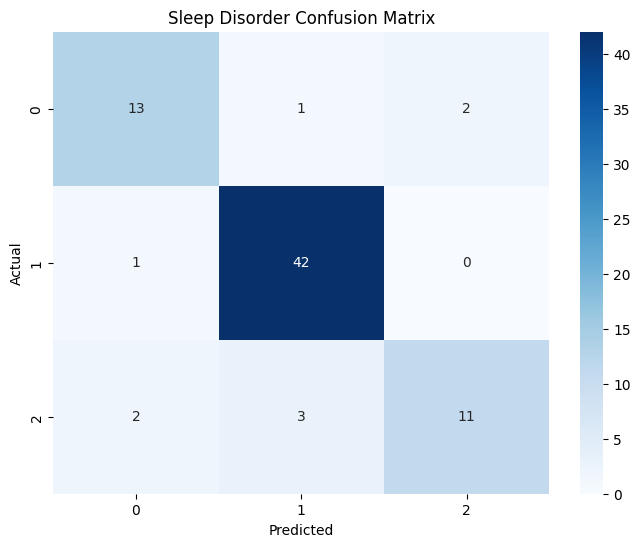


Sleep Quality Regression Metrics:
Mean Squared Error: 0.03790400600405279
R-squared: 0.9640996936130096
Sleep Quality Train R-squared: 0.9948524222118914

Physical Activity Level Regression Metrics:
Mean Squared Error: 0.01826315248831598
R-squared: 0.9810541201483359
Physical Activity Level Train R-squared: 0.9940516418707785


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Train Accuracy (Classification)
y_train_pred_sd = model_sd.predict(X_train_sd)
train_accuracy_sd = accuracy_score(y_train_sd, y_train_pred_sd)

# Train Accuracy (Regression)
y_train_pred_sq = model_sq.predict(X_train_sq)
train_r2_sq = r2_score(y_train_sq, y_train_pred_sq)

y_train_pred_pa = model_pa.predict(X_train_pa)
train_r2_pa = r2_score(y_train_pa, y_train_pred_pa)

# Evaluation (Classification Metrics)
print("Sleep Disorder Classification Report:")
print(classification_report(y_test_sd, y_pred_sd))
print("Sleep Disorder Accuracy:", accuracy_score(y_test_sd, y_pred_sd))
print("Sleep Disorder Train Accuracy:", train_accuracy_sd)

# Confusion Matrix (Classification)
cm_sd = confusion_matrix(y_test_sd, y_pred_sd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sd, annot=True, fmt='d', cmap='Blues')
plt.title('Sleep Disorder Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation (Regression Metrics)
print("\nSleep Quality Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_sq, y_pred_sq))
print("R-squared:", r2_score(y_test_sq, y_pred_sq))
print("Sleep Quality Train R-squared:", train_r2_sq)

print("\nPhysical Activity Level Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_pa, y_pred_pa))
print("R-squared:", r2_score(y_test_pa, y_pred_pa))
print("Physical Activity Level Train R-squared:", train_r2_pa)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

# Assuming you have df_standard, target_sleep_disorder, target_sleep_quality, target_physical_activity

features = df_standard.drop(['Sleep Disorder', 'Quality of Sleep', 'Physical Activity Level'], axis=1)

# Split data into training and testing sets (for Sleep Disorder)
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(features, target_sleep_disorder, test_size=0.2, random_state=42)

# Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_sd, y_train_sd)
    y_pred = model.predict(X_test_sd)
    accuracy = accuracy_score(y_test_sd, y_pred)
    results[name] = accuracy

# Accuracy Table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 11
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
from sklearn.model_selection import GridSearchCV
# Parameter grid for RandomForestClassifier (for Sleep Disorder and Sleep Quality)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Parameter grid for Logistic Regression (for Sleep Disorder and Sleep Quality)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Parameter grid for Gradient Boosting Classifier (for Sleep Disorder and Sleep Quality)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Parameter grid for RandomForestRegressor (for Physical Activity Level and Sleep Quality if treated as regression)
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
# GridSearchCV for RandomForest
grid_search_rf_sd = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                param_grid=param_grid_rf,
                                cv=5,  # Number of cross-validation folds
                                scoring='accuracy')  # Metric to optimize
grid_search_rf_sd.fit(X_train_sd, y_train_sd)
best_rf_sd = grid_search_rf_sd.best_estimator_
y_pred_best_rf_sd = best_rf_sd.predict(X_test_sd)
accuracy_best_rf_sd = accuracy_score(y_test_sd, y_pred_best_rf_sd)
print("\nBest Random Forest (Sleep Disorder) Accuracy:", accuracy_best_rf_sd)
print("Best Random Forest (Sleep Disorder) Parameters:", grid_search_rf_sd.best_params_)

# GridSearchCV for Logistic Regression
grid_search_lr_sd = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                                param_grid=param_grid_lr,
                                cv=5,
                                scoring='accuracy')
grid_search_lr_sd.fit(X_train_sd, y_train_sd)
best_lr_sd = grid_search_lr_sd.best_estimator_
y_pred_best_lr_sd = best_lr_sd.predict(X_test_sd)
accuracy_best_lr_sd = accuracy_score(y_test_sd, y_pred_best_lr_sd)
print("\nBest Logistic Regression (Sleep Disorder) Accuracy:", accuracy_best_lr_sd)
print("Best Logistic Regression (Sleep Disorder) Parameters:", grid_search_lr_sd.best_params_)




Best Random Forest (Sleep Disorder) Accuracy: 0.88
Best Random Forest (Sleep Disorder) Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Logistic Regression (Sleep Disorder) Accuracy: 0.8666666666666667
Best Logistic Regression (Sleep Disorder) Parameters: {'C': 10, 'solver': 'lbfgs'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Parameter grid for RandomForestRegressor
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# GridSearchCV for RandomForestRegressor (Physical Activity Level)
grid_search_rfr_pa = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                 param_grid=param_grid_rfr,
                                 cv=5,
                                 scoring='neg_mean_squared_error')  # Use a regression metric
grid_search_rfr_pa.fit(X_train_pa, y_train_pa)

best_rfr_pa = grid_search_rfr_pa.best_estimator_
y_pred_best_rfr_pa = best_rfr_pa.predict(X_test_pa)
mse_best_rfr_pa = mean_squared_error(y_test_pa, y_pred_best_rfr_pa)
r2_best_rfr_pa = r2_score(y_test_pa, y_pred_best_rfr_pa)

print("\nBest Random Forest Regressor (Physical Activity Level) MSE:", mse_best_rfr_pa)
print("Best Random Forest Regressor (Physical Activity Level) R-squared:", r2_best_rfr_pa)
print("Best Random Forest Regressor (Physical Activity Level) Parameters:", grid_search_rfr_pa.best_params_)


Best Random Forest Regressor (Physical Activity Level) MSE: 0.020005031005994565
Best Random Forest Regressor (Physical Activity Level) R-squared: 0.9792471253738442
Best Random Forest Regressor (Physical Activity Level) Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Parameter grid for RandomForestRegressor (same as above or adjust as needed)

# GridSearchCV for RandomForestRegressor (Sleep Quality)
grid_search_rfr_sq = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                 param_grid=param_grid_rfr,
                                 cv=5,
                                 scoring='neg_mean_squared_error')  # Use a regression metric
grid_search_rfr_sq.fit(X_train_sq, y_train_sq)

best_rfr_sq = grid_search_rfr_sq.best_estimator_
y_pred_best_rfr_sq = best_rfr_sq.predict(X_test_sq)
mse_best_rfr_sq = mean_squared_error(y_test_sq, y_pred_best_rfr_sq)
r2_best_rfr_sq = r2_score(y_test_sq, y_pred_best_rfr_sq)

print("\nBest Random Forest Regressor (Sleep Quality) MSE:", mse_best_rfr_sq)
print("Best Random Forest Regressor (Sleep Quality) R-squared:", r2_best_rfr_sq)
print("Best Random Forest Regressor (Sleep Quality) Parameters:", grid_search_rfr_sq.best_params_)


Best Random Forest Regressor (Sleep Quality) MSE: 0.028784290486148945
Best Random Forest Regressor (Sleep Quality) R-squared: 0.9727373183859671
Best Random Forest Regressor (Sleep Quality) Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [120]:
import joblib

# Save the Sleep Disorder classification model
joblib.dump(model_sd, 'sleep_disorder_model.joblib')

# Save the Sleep Quality regression model
joblib.dump(model_sq, 'sleep_quality_model.joblib')

# Save the Physical Activity Level regression model
joblib.dump(model_pa, 'physical_activity_model.joblib')

print("Models saved successfully using joblib!")

Models saved successfully using joblib!


In [121]:
# Save the fitted scaler
joblib.dump(standard_scaler, 'scaler.joblib')
print("Scaler saved successfully as scaler.joblib")

Scaler saved successfully as scaler.joblib
